<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-载入分析库和数据" data-toc-modified-id="1.-载入分析库和数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. 载入分析库和数据</a></span></li><li><span><a href="#2.-异常值处理" data-toc-modified-id="2.-异常值处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. 异常值处理</a></span></li><li><span><a href="#3.-特征构造" data-toc-modified-id="3.-特征构造-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. 特征构造</a></span><ul class="toc-item"><li><span><a href="#3.1-决策树模型特征构造" data-toc-modified-id="3.1-决策树模型特征构造-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1 决策树模型特征构造</a></span><ul class="toc-item"><li><span><a href="#3.1.1-使用时间" data-toc-modified-id="3.1.1-使用时间-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>3.1.1 使用时间</a></span></li><li><span><a href="#3.1.2-城市编码" data-toc-modified-id="3.1.2-城市编码-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>3.1.2 城市编码</a></span></li><li><span><a href="#3.1.3-品牌销售统计量" data-toc-modified-id="3.1.3-品牌销售统计量-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>3.1.3 品牌销售统计量</a></span></li><li><span><a href="#3.1.4-功率变量数据分桶" data-toc-modified-id="3.1.4-功率变量数据分桶-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>3.1.4 功率变量数据分桶</a></span></li></ul></li><li><span><a href="#3.2-LR-NN模型的特征构造" data-toc-modified-id="3.2-LR-NN模型的特征构造-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.2 LR NN模型的特征构造</a></span><ul class="toc-item"><li><span><a href="#3.2.1-功率数据处理" data-toc-modified-id="3.2.1-功率数据处理-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>3.2.1 功率数据处理</a></span></li><li><span><a href="#3.2.2-公里数据处理" data-toc-modified-id="3.2.2-公里数据处理-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>3.2.2 公里数据处理</a></span></li><li><span><a href="#3.2.3-构造的数据" data-toc-modified-id="3.2.3-构造的数据-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>3.2.3 构造的数据</a></span></li></ul></li></ul></li><li><span><a href="#4.-特征筛选" data-toc-modified-id="4.-特征筛选-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. 特征筛选</a></span><ul class="toc-item"><li><span><a href="#4.1-过滤式" data-toc-modified-id="4.1-过滤式-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>4.1 过滤式</a></span></li><li><span><a href="#4.2-包裹式" data-toc-modified-id="4.2-包裹式-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>4.2 包裹式</a></span></li><li><span><a href="#4.3-嵌入式" data-toc-modified-id="4.3-嵌入式-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>4.3 嵌入式</a></span></li></ul></li><li><span><a href="#经验总结" data-toc-modified-id="经验总结-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>经验总结</a></span></li></ul></div>

# 1. 载入分析库和数据

In [846]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from operator import itemgetter

%matplotlib inline

In [847]:
path = './datalab/'
Train_data = pd.read_csv(path+'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path+'used_car_testA_20200313.csv', sep=' ')
print(Train_data.shape)
print(Test_data.shape)

(150000, 31)
(50000, 30)


In [848]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [849]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [850]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [851]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


从统计数据中可知，非匿名变量的power可能存在缺失值

# 2. 异常值处理

In [852]:
def outliers_proc(data, col_name, scale = 3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    
    # Calculation of the number of outliers and remove them
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Number of deletions: {}".format(len(index)))
    data_n = data_n.drop(index)
    
    # Calculation of the number of remains
    data_n.reset_index(drop=True, inplace=True)
    print("Number of remains: {}".format(data_n.shape[0]))
    
    # Characteritics of data less than the lower bound
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers_low = data_series.iloc[index_low]
    print("Description of data less than the lower bound:")
    print(pd.Series(outliers_low).describe())
    
    # Characteritics of data more than the upper bound
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers_up = data_series.iloc[index_up]
    print("Description of data larger than the upper bound:")
    print(pd.Series(outliers_up).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set2", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set2", ax=ax[1])
    
    # return the treated dataset
    return data_n

Number of deletions: 963
Number of remains: 149037
Description of data less than the lower bound:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


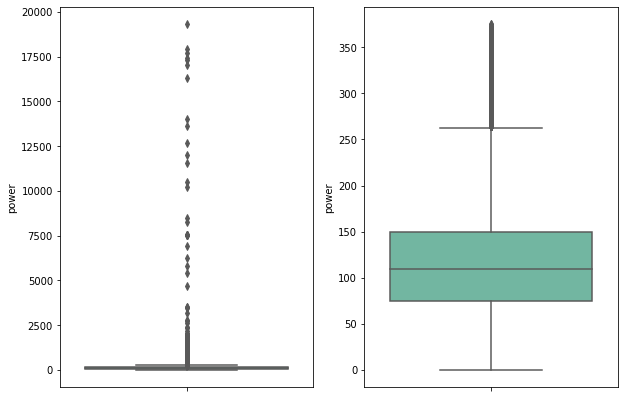

In [853]:
Train_data = outliers_proc(Train_data, 'power', scale=3)

# 3. 特征构造

In [854]:
# combind the training and test sets
Train_data['train'] = 1
Test_data['train'] = 0
data = pd.concat([Train_data, Test_data], ignore_index = True, sort = False)

In [855]:
Train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,1
149033,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,1
149034,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,1
149035,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,1


## 3.1 决策树模型特征构造

### 3.1.1 使用时间

In [856]:
# 构造特征：使用时间 = 售卖时间 - 注册时间，反应汽车使用时间
## 1）时间出错的数据强制转换 errors='coerce'
data['usedTime'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                     pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [857]:
## 2）单独挑出时间出错的数据，检查错误原因：预览发现这些日期里月份为00，导致转换错误
errRegData = pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce').isnull()
errCreData = pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce').isnull()
print(data['regDate'][errRegData])
print(data['creatDate'][errCreData])

14        20070009
20        19970004
22        19970008
42        19960009
51        20020006
            ...   
198991    20000001
198996    20010001
199007    20030003
199021    20080004
199035    20020008
Name: regDate, Length: 15072, dtype: int64
Series([], Name: creatDate, dtype: int64)


In [858]:
## 3）计算出错的数据占原数据的比例，发现比例有点高，故先不考虑删除，同时进行处理
## 注：XGBoost之类的决策树本身能处理缺失值，故此错误可忽略
data['usedTime'].isnull().sum() / data['usedTime'].count()

0.08192862772810046

In [859]:
## 4）检查错误的日期月份里是否都有00
RegEqual0 = data['regDate'][errRegData].astype(str).str[4:6] == '00'
print(data['regDate'][errRegData].count() == RegEqual0.count())

CreEqual0 = data['creatDate'][errCreData].astype(str).str[4:6] == '00'
print(data['creatDate'][errCreData].count() == CreEqual0.count())

True
True


In [860]:
## 5）将00转换为01
replacedRegDate = data['regDate'][errRegData].astype(str).str.slice_replace(4, 6, "01")
data['regDate'][errRegData] = replacedRegDate

replacedCreDate = data['creatDate'][errCreData].astype(str).str.slice_replace(4, 6, "01")
data['creatDate'][errCreData] = replacedCreDate

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [861]:
## 6）检查是否成功转换，并重新计算使用时间
errRegData = pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce').isnull()
errCreData = pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce').isnull()

print('Number of null date in "regDate" date: {}'.format(errRegData.sum()))
print('Number of null date in "creatDate" date: {}'.format(errCreData.sum()))

data['usedTime'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                     pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

Number of null date in "regDate" date: 0
Number of null date in "creatDate" date: 0


### 3.1.2 城市编码

In [862]:
# ??????五位数邮编——德国邮编，从邮编中提取城市信息，加入先验知识
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
data['regionCode']

0         1046
1         4366
2         2806
3          434
4         6977
          ... 
199032    3219
199033    1857
199034    3452
199035    1998
199036    3276
Name: regionCode, Length: 199037, dtype: int64

In [863]:
data['city'].value_counts()

     48645
1    42188
2    35133
3    27325
4    19945
5    13462
6     8313
7     3887
8      139
Name: city, dtype: int64

### 3.1.3 品牌销售统计量

In [864]:
# 用Training data计算不同品牌的销售统计量
Train_gb = Train_data.groupby("brand")

# 价格小于200的条目数目和比例：考虑移除这些异常值
def less200(arr):
    return arr[arr < 200].sum()
def less200per(arr):
    return round(arr[arr < 200].sum() / (len(arr[arr < 200]) + 1), 2)


brandDataInfo = Train_gb['price'].agg(['count', 'max', 'median', 'mean', 'min', 'sum', 'std', less200, less200per])
brandDataInfo.columns = ('brand_price_count', 'brand_price_max', 'brand_price_median', 'brand_price_mean', 'brand_price_min', 'brand_price_sum', 'brand_price_std', 'brand_price_less200', 'brand_price_less200per')

In [865]:
# 与源数据进行整合，注意仅整合至Training data的整合
data = data.merge(brandDataInfo, how = 'left', on= 'brand')
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,city,brand_price_count,brand_price_max,brand_price_median,brand_price_mean,brand_price_min,brand_price_sum,brand_price_std,brand_price_less200,brand_price_less200per
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,1,10193,35990,1800,3576.721083,13,36457518,4562.233331,42394,122.17
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,4,13656,84000,6399,9083.523946,15,124044603,8988.865406,4400,100.00
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,2,1458,45000,8500,9858.582990,100,14373814,5425.058140,200,66.67
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,,13994,92900,5200,8077.333857,15,113034210,8244.695287,2045,73.04
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,6,4662,31500,2300,3306.375375,20,15414322,3344.689763,7633,117.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,3,16575,99999,5999,8342.628597,12,138279069,8089.863295,7335,107.87
199033,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,1,31429,68500,3199,5527.369563,13,173719698,6261.371627,55090,125.20
199034,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,3,13656,84000,6399,9083.523946,15,124044603,8988.865406,4400,100.00
199035,199998,96900,20020108,27.0,1,0.0,0.0,1.0,334,15.0,...,1,13656,84000,6399,9083.523946,15,124044603,8988.865406,4400,100.00


### 3.1.4 功率变量数据分桶

**做数据分桶的原因**
1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
3. LR属于广义线性模型，表达能力有限，经过离散化后每个变量有单独的权重，相当于引入了非线性，能提升模型的表达能力(模型可进行什么运算，拟合多么复杂的函数)，加大拟合；???
4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

注：LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

In [866]:
### 数据分桶以power为例
## 1）查看power的数据统计情况
Power_cov = data['power'].copy()
print(Power_cov.describe())

## 2）查看power数值等于0的数据比例
print('power数值等于0的数据比例：{}'.format(Power_cov[Power_cov == 0].count() / len(Power_cov)))

## 3）查看power数值超过1500的数据比例
print('power数值大于1500的数据比例：{}'.format(Power_cov[Power_cov > 1500].count() / len(Power_cov)))

count    199037.000000
mean        115.939041
std         108.152893
min           0.000000
25%          75.000000
50%         109.000000
75%         150.000000
max       20000.000000
Name: power, dtype: float64
power数值等于0的数据比例：0.0855318357893256
power数值大于1500的数据比例：0.00015072574445957284


In [867]:
data[data['power'] == 0]

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,city,brand_price_count,brand_price_max,brand_price_median,brand_price_mean,brand_price_min,brand_price_sum,brand_price_std,brand_price_less200,brand_price_less200per
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,4,13656,84000,6399,9083.523946,15,124044603,8988.865406,4400,100.00
14,14,1896,20070109,1.0,0,NaN,NaN,0.0,0,15.0,...,3,31429,68500,3199,5527.369563,13,173719698,6261.371627,55090,125.20
54,54,48983,19970804,110.0,5,1.0,0.0,0.0,0,12.5,...,3,4662,31500,2300,3306.375375,20,15414322,3344.689763,7633,117.43
67,67,128546,20070108,20.0,15,1.0,0.0,0.0,0,15.0,...,,1458,45000,8500,9858.582990,100,14373814,5425.058140,200,66.67
72,72,124713,19990403,19.0,14,3.0,0.0,0.0,0,15.0,...,,16073,38990,1700,3053.359796,12,49076652,3605.595127,55594,127.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198956,199919,48556,20040111,49.0,1,0.0,1.0,1.0,0,15.0,...,3,13656,84000,6399,9083.523946,15,124044603,8988.865406,4400,100.00
198971,199934,67770,19950611,48.0,14,1.0,0.0,1.0,0,15.0,...,,16073,38990,1700,3053.359796,12,49076652,3605.595127,55594,127.51
198975,199938,43276,20000108,21.0,16,NaN,NaN,NaN,0,0.5,...,1,2219,17900,2999,3640.537179,20,8078352,2450.906089,379,94.75
198991,199954,175289,20000101,59.0,19,2.0,1.0,0.0,0,15.0,...,,1386,42350,2800,5215.215007,20,7228288,6186.538949,1328,110.67


1. power数据异常值为0的比例为8.6%，如果使用树模型可不用处理，其他算法可能需要处理（删除或填补）--> 未处理
2. 虽然power的单位未在题干中给出，但从统计结果可以看出，power的均值和中位数均为110左右，结合生活常识，因此推断单位应该为马力（hp）。通过[参考资料](https://www.zhihu.com/question/27911313)可知目前汽车最大的功率约为1500马力，且大于1500的power占比约仅为0.015%，因此考虑对1500以上的数据进行【删除】或截断 --> 截断

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


((array([-4.4947554 , -4.30226134, -4.1977774 , ...,  4.1977774 ,
          4.30226134,  4.4947554 ]),
  array([   0,    0,    0, ..., 1500, 1500, 1500])),
 (65.03582930932271, 115.42366997090991, 0.9493528390933125))

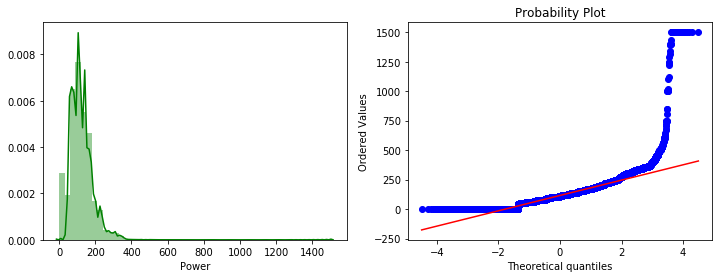

In [868]:
## 4）【截断大于1500】power数值后的分布
data['power'][data['power'] > 1500] = 1500
fig, axes = plt.subplots(ncols = 2, nrows = 1)
fig.set_size_inches(12, 4)
sns.distplot(data['power'], color = 'green', axlabel = 'Power', ax = axes[0])
stats.probplot(data['power'], dist = 'norm', fit = True, plot = axes[1])

In [869]:
## 5）设定分箱[0-1500]
bin = [i * 20 for i in range(76)]
data['power_bin'] = pd.cut(data['power'], bin, labels = False)
data[data['power'] > 1000][['power_bin', 'power']]
data['power_bin'].value_counts()

5.0     37166
6.0     25131
3.0     24849
2.0     19871
7.0     17084
8.0     16332
4.0     16152
9.0      7767
11.0     5019
10.0     4620
12.0     1989
13.0     1545
15.0     1244
14.0     1084
16.0      763
17.0      492
1.0       312
0.0       169
18.0      107
19.0       71
20.0       39
22.0       36
74.0       30
21.0       26
23.0       18
24.0       17
26.0       13
25.0       12
30.0        8
27.0        8
50.0        5
29.0        5
37.0        4
69.0        4
42.0        2
33.0        2
28.0        2
61.0        2
55.0        2
65.0        1
66.0        1
64.0        1
32.0        1
49.0        1
62.0        1
35.0        1
40.0        1
71.0        1
36.0        1
31.0        1
Name: power_bin, dtype: int64

In [870]:
# 删除无效变量
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [871]:
print(data.shape)
data.columns

(199037, 41)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train', 'usedTime',
       'city', 'brand_price_count', 'brand_price_max', 'brand_price_median',
       'brand_price_mean', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_less200', 'brand_price_less200per',
       'power_bin'],
      dtype='object')

In [872]:
# 目前的数据其实已经可以给【树模型】使用，所以我们导出一下
data.to_csv('data_for_tree.csv', index=0)

## 3.2 LR NN模型的特征构造

### 3.2.1 功率数据处理

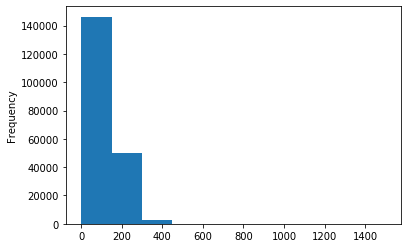

In [873]:
# 查看power数据分布，因只针对training data进行了处理，未对test data处理，导致长尾分布
data['power'].plot.hist()

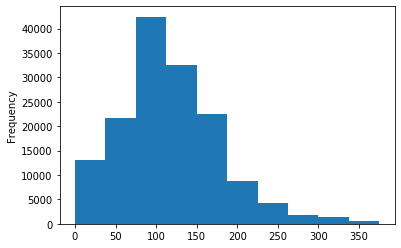

In [874]:
Train_data['power'].plot.hist()

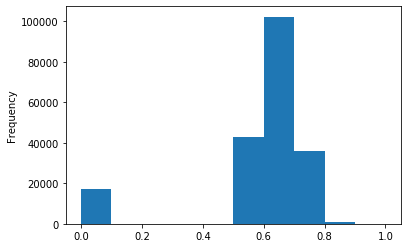

In [875]:
# 取log，做归一化
from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

### 3.2.2 公里数据处理

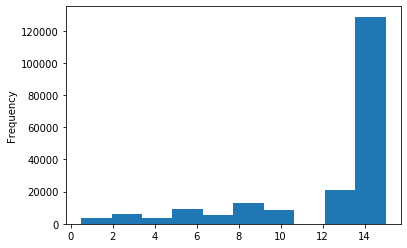

In [876]:
# 公里数据已分桶，作图
data['kilometer'].plot.hist()

In [877]:
data['kilometer'].value_counts()

15.0    128682
12.5     20958
10.0      8506
9.0       6992
8.0       6043
7.0       5442
6.0       4886
5.0       4197
4.0       3576
3.0       3309
2.0       3034
0.5       2431
1.0        981
Name: kilometer, dtype: int64

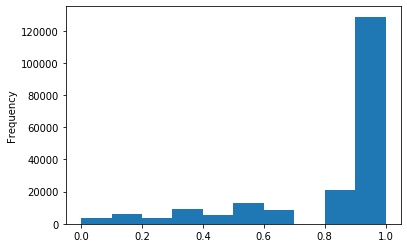

In [878]:
# 直接做归一化
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

### 3.2.3 构造的数据

In [879]:
# 针对构造的统计量特征做归一化
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

types = ['brand_price_count', 'brand_price_max', 'brand_price_median', 'brand_price_mean', 'brand_price_min', 'brand_price_sum', 'brand_price_std', 'brand_price_less200', 'brand_price_less200per']
for type_i in types:
    data[type_i] = max_min(data[type_i])

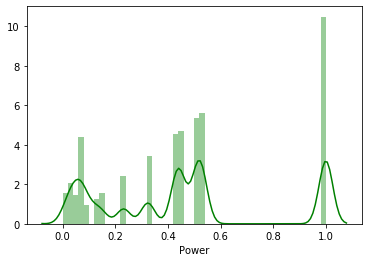

In [880]:
sns.distplot(data['brand_price_count'], color = 'green', axlabel = 'Power')

In [881]:
# 对类别特征进行虚拟变量编码——OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [882]:
print(data.shape)
data.columns

(199037, 392)


Index(['SaleID', 'name', 'power', 'kilometer', 'seller', 'offerType', 'price',
       'v_0', 'v_1', 'v_2',
       ...
       'power_bin_50.0', 'power_bin_55.0', 'power_bin_61.0', 'power_bin_62.0',
       'power_bin_64.0', 'power_bin_65.0', 'power_bin_66.0', 'power_bin_69.0',
       'power_bin_71.0', 'power_bin_74.0'],
      dtype='object', length=392)

In [883]:
# 这份数据可以给 LR 用
data.to_csv('data_for_lr.csv', index=0)

# 4. 特征筛选

## 4.1 过滤式

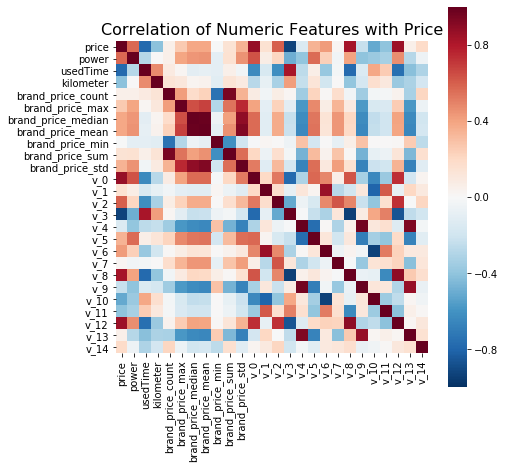

In [907]:
# 相关性热图
data_numeric = data[['price', 'power', 'usedTime', 'kilometer', 'brand_price_count', 'brand_price_max', 'brand_price_median', 'brand_price_mean', 'brand_price_min', 'brand_price_sum', 'brand_price_std', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14']]
correlation = data_numeric.corr(method = 'spearman')

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price', y = 1, size = 16)
sns.heatmap(correlation, square = True, vmin = -1, vmax = 1, center = 0, cmap = 'RdBu_r')

In [910]:
# 留下相关系数超过正负0.2的特征，便于预测
highlyCorrFeatures = data_numeric.corr(method = 'spearman')['price'].abs() > 0.2
highlyCorrFeatures = highlyCorrFeatures.drop('price')
highlyCorrFeatures

power                  True
usedTime               True
kilometer              True
brand_price_count     False
brand_price_max        True
brand_price_median     True
brand_price_mean       True
brand_price_min       False
brand_price_sum       False
brand_price_std        True
v_0                    True
v_1                   False
v_2                    True
v_3                    True
v_4                   False
v_5                    True
v_6                    True
v_7                   False
v_8                    True
v_9                    True
v_10                   True
v_11                   True
v_12                   True
v_13                  False
v_14                  False
Name: price, dtype: bool

In [ ]:
dataSubsetted = data[highlyCorrFeatures]

## 4.2 包裹式

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
x = data.drop(['price'], axis=1)
x = x.fillna(0)
y = data['price']
sfs.fit(x, y)
sfs.k_feature_names_ 

In [ ]:
# 边际效益
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

## 4.3 嵌入式

In [ ]:
# 下一章介绍，Lasso 回归和决策树可以完成嵌入式特征选择
# 大部分情况下都是用嵌入式做特征筛选

# 经验总结

特征工程是比赛中最至关重要的的一块，特别的传统的比赛，大家的模型可能都差不多，调参带来的效果增幅是非常有限的，但特征工程的好坏往往会决定了最终的排名和成绩。

特征工程的主要目的在于将数据转换为能更好地表示潜在问题的特征，从而提高机器学习的性能。比如，异常值处理是为了去除噪声，填补缺失值可以加入先验知识等。

特征构造也属于特征工程的一部分，其目的是为了增强数据的表达。

有些比赛的特征是匿名特征，这导致我们并不清楚特征相互直接的关联性，这时我们就只有单纯基于特征进行处理，比如装箱，groupby，agg等这样一些操作进行一些特征统计，此外还可以对特征进行进一步的log，exp等变换，或者对多个特征进行四则运算（如上面我们算出的使用时长），多项式组合等然后进行筛选。由于特性的匿名性其实限制了很多对于特征的处理，当然有些时候用NN去提取一些特征也会达到意想不到的良好效果。

对于知道特征含义（非匿名）的特征工程，特别是在工业类型比赛中，会基于信号处理，频域提取，丰度，偏度等构建更为有实际意义的特征，这就是结合背景的特征构建，在推荐系统中也是这样的，各种类型点击率统计，各时段统计，加用户属性的统计等等，这样一种特征构建往往要深入分析背后的业务逻辑或者说物理原理，从而才能更好的找到magic。

当然特征工程其实是和模型结合在一起的，这就是为什么要为LR NN做分桶和特征归一化的原因，而对于特征的处理效果和特征重要性等往往要通过模型来验证。

总的来说，特征工程是一个入门简单，但想精通非常难的一件事。